# Expectation values for Boltzmann Distribution

In this notebook, we will write code to compute the expectation values of a few different properties, at a given temperature. We will then see how these change with temperature.

This is basically the same thing we just did in the last notebook, except now we will be running the code by loading your proper python package!

We will generalize this model slightly by adding one additional term, $\sum_i \mu_i s_i$. Thinking of this as a physical model, this is essentially adding a magnetic field to the system. In practice, this simply allows us to bias the results in favor of configurations that have an overall net magnetization. :
$$ \hat{H} = \sum_{(i,j)\in E}J_{ij} s_is_j + \sum_i \mu_i s_i.$$

## Load packages

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import montecarlo as montecarlo
from montecarlo.bitstring import *
from montecarlo.ising_hamiltonian import *

ImportError: attempted relative import beyond top-level package

## Create a graph that defines the Ising interactions

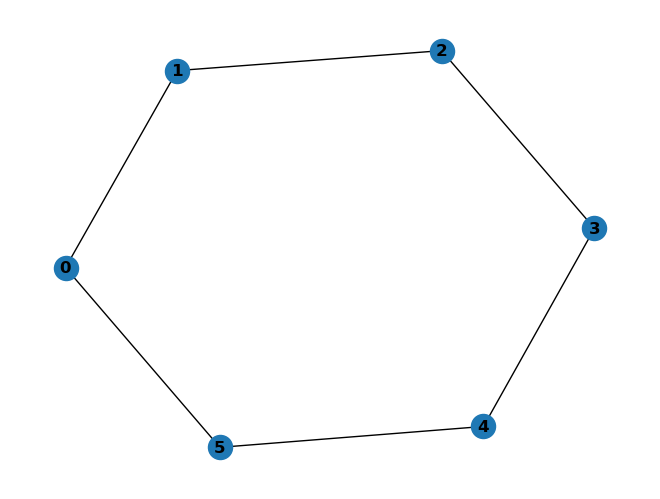

In [4]:
N = 6
Jval = 2.0
G = nx.Graph()
G.add_nodes_from([i for i in range(N)])
G.add_edges_from([(i,(i+1)% G.number_of_nodes() ) for i in range(N)])
for e in G.edges:
    G.edges[e]['weight'] = Jval

# Now Draw the graph. 
plt.figure(1)
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

## Use your Python Package
1. Add your `BitString` class to your package
1. Define a new class called `IsingHamiltonian` in your package. It should take in a graph (G) and implement the following methods:

    ```python
    energy(config::BitString)
    set_mu(mus::np.array)
    compute_average_values(T::int) 
    ```

In [7]:
# Define a new configuration instance for a 6-site lattice
conf = BitString(N)
ham = IsingHamiltonian(G)
ham.set_mu(np.array([.1 for i in range(N)]))

conf.flip_site(2)
conf.flip_site(3)
print(conf)
e = ham.energy(conf)
assert(np.isclose(e, 3.8))

AttributeError: 'IsingHamiltonian' object has no attribute 'set_mu'

In [4]:
# Define a new configuration instance for a 6-site lattice
conf = montecarlo.BitString(N)
ham = montecarlo.IsingHamiltonian(G)

# Compute the average values for Temperature = 1
E, M, HC, MS = ham.compute_average_values(1)


print(" E  = %12.8f" %E)
print(" M  = %12.8f" %M)
print(" HC = %12.8f" %HC)
print(" MS = %12.8f" %MS)

assert(np.isclose(E,  -11.95991923))
assert(np.isclose(M,   -0.00000000))
assert(np.isclose(HC,   0.31925472))
assert(np.isclose(MS,   0.01202961))


 E  = -11.95991923
 M  =  -0.00000000
 HC =   0.31925472
 MS =   0.01202961


# Properties vs Temperature (exact)

 Number of configurations:  64
 Critical Temperature:   4.30000000 
     E:   -5.36028889
     M:   -0.00000000
     HC:   1.18893365
     MS:   0.54308001
 Critical Temperature:   2.20000000
 E = -10.21957820 @ T =   2.00000000


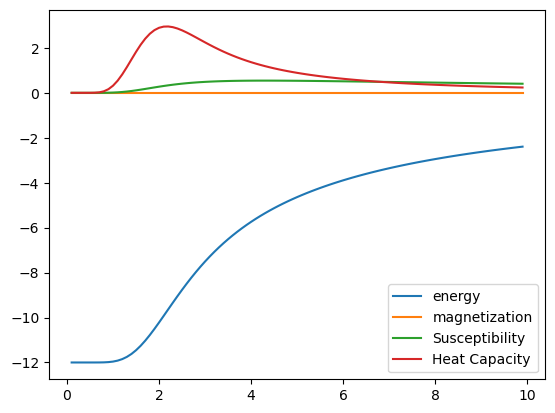

In [5]:
# Initialize lists that we will fill with the property vs. temperature data
e_list = []
e2_list = []
m_list = []
m2_list = []
T_list = []

# Create BitString
conf = montecarlo.BitString(N)
ham = montecarlo.IsingHamiltonian(G)
print(" Number of configurations: ", 2**len(conf))


for Ti in range(1,100):
    T = .1*Ti
    
    E, M, HC, MS = ham.compute_average_values(T)
    
    e_list.append(E)
    m_list.append(M)
    e2_list.append(HC)
    m2_list.append(MS)
    T_list.append(T)


plt.plot(T_list, e_list, label="energy");
plt.plot(T_list, m_list, label="magnetization");
plt.plot(T_list, m2_list, label="Susceptibility");
plt.plot(T_list, e2_list, label="Heat Capacity");
plt.legend();

Tc_ind = np.argmax(m2_list)
print(" Critical Temperature: %12.8f " %(T_list[Tc_ind]))
print("     E:  %12.8f" %(e_list[Tc_ind]))
print("     M:  %12.8f" %(m_list[Tc_ind]))
print("     HC: %12.8f" %(e2_list[Tc_ind]))
print("     MS: %12.8f" %(m2_list[Tc_ind]))
Tc2 = T_list[np.argmax(e2_list)]
print(" Critical Temperature: %12.8f" %(Tc2))

print(" E = %12.8f @ T = %12.8f"% (e_list[T_list.index(2.00)], 2.0))


----
